In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score,recall_score,f1_score,roc_auc_score

In [2]:
df = pd.read_csv(r'D:\Simplilearn all projects\Data\Fraud.csv')

In [3]:
df.shape

(6362620, 11)

In [4]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


<AxesSubplot:>

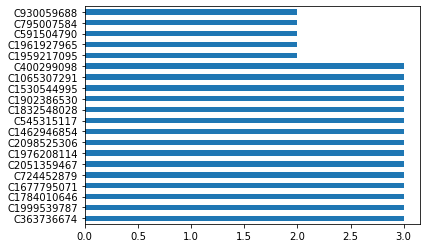

In [5]:
df['nameOrig'].value_counts().head(20).plot(kind='barh')

In [6]:
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6362620 entries, 2865878 to 4173499
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 711.5+ MB


#### There is no null values in our data sets...........

In [7]:
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

Data Preprocessing.............

In [8]:
df.describe().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6362620.00,6362620.00,6362620.00,6362620.00,6.362620e+06,6.362620e+06,6362620.00,6362620.0
mean,243.40,179861.90,833883.10,855113.67,1.100702e+06,1.224996e+06,0.00,0.0
std,142.33,603858.23,2888242.67,2924048.50,3.399180e+06,3.674129e+06,0.04,0.0
min,1.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
25%,156.00,13389.57,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.0
50%,239.00,74871.94,14208.00,0.00,1.327057e+05,2.146614e+05,0.00,0.0
75%,335.00,208721.48,107315.18,144258.41,9.430367e+05,1.111909e+06,0.00,0.0
max,743.00,92445516.64,59585040.37,49585040.37,3.560159e+08,3.561793e+08,1.00,1.0


###### This is statical calculation in between the data which tells about the all mean, median, mode, percentile values

In [9]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [10]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

<AxesSubplot:xlabel='isFraud', ylabel='count'>

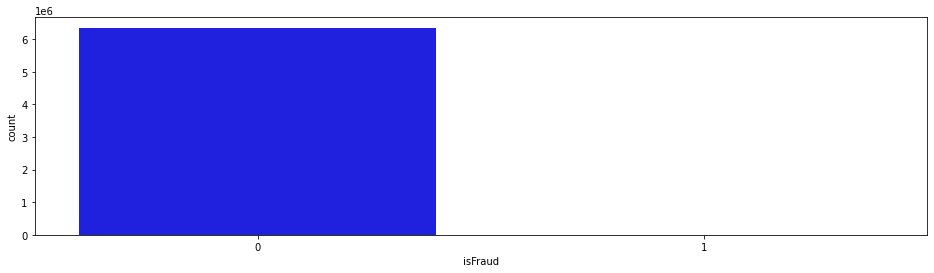

In [11]:
plt.figure(figsize=(16,4))
sns.countplot(df['isFraud'], palette=['b','g'])

##### Mean Amount difference between fraud / normal transactions

In [12]:
df.groupby("isFraud")['amount'].mean().round(2)

isFraud
0     178197.04
1    1467967.30
Name: amount, dtype: float64

#### Show number of frauds by categories

In [13]:
pd.crosstab(df["type"],df["isFraud"])

isFraud,0,1
type,,
CASH_IN,1399284,0
CASH_OUT,2233384,4116
DEBIT,41432,0
PAYMENT,2151495,0
TRANSFER,528812,4097


Insights :

1. It looks like there is significant difference in amount between fraud and normal transactions


Now we are going to convert Imbalanced data into Balanced data sets

In [14]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['isFraud'] == 1]
non_fraud_df = df.loc[df['isFraud'] == 0][:8213]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)


In [15]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
815148,40,CASH_OUT,572639.79,C455780593,11013.00,0.0,C792784476,1759640.92,2332280.70,0,0
1768139,162,TRANSFER,406064.65,C1683220124,0.00,0.0,C1111997153,1273034.50,1679099.15,0,0
6040729,488,CASH_OUT,50279.40,C732624402,50279.40,0.0,C1786899731,1108375.76,1158655.16,1,0
4785644,341,TRANSFER,127528.92,C435054778,127528.92,0.0,C1175951060,0.00,0.00,1,0
724,1,CASH_OUT,416001.33,C749981943,0.00,0.0,C667346055,102.00,9291619.62,1,0


Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: isFraud, dtype: float64


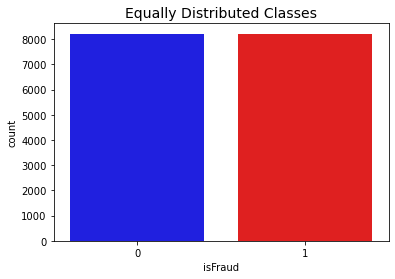

In [16]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['isFraud'].value_counts()/len(new_df))



sns.countplot(new_df['isFraud'], data=new_df, palette=['b','r'])
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

check the original correlation of the data ie df:

In [17]:
df.corr().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.02,-0.01,-0.01,0.03,0.03,0.03,0.00
amount,0.02,1.00,-0.00,-0.01,0.29,0.46,0.08,0.01
oldbalanceOrg,-0.01,-0.00,1.00,1.00,0.07,0.04,0.01,0.00
newbalanceOrig,-0.01,-0.01,1.00,1.00,0.07,0.04,-0.01,0.00
oldbalanceDest,0.03,0.29,0.07,0.07,1.00,0.98,-0.01,-0.00
newbalanceDest,0.03,0.46,0.04,0.04,0.98,1.00,0.00,-0.00
isFraud,0.03,0.08,0.01,-0.01,-0.01,0.00,1.00,0.04
isFlaggedFraud,0.00,0.01,0.00,0.00,-0.00,-0.00,0.04,1.00


Now check the correlation of the new data frame ie new_df:

In [18]:
new_df.corr().round(2)

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.00,0.15,0.08,-0.02,-0.01,0.02,0.33,0.04
amount,0.15,1.00,0.63,0.12,0.02,0.28,0.34,0.07
oldbalanceOrg,0.08,0.63,1.00,0.83,0.00,0.11,0.12,0.06
newbalanceOrig,-0.02,0.12,0.83,1.00,0.04,0.00,-0.13,0.09
oldbalanceDest,-0.01,0.02,0.00,0.04,1.00,0.92,-0.09,-0.01
newbalanceDest,0.02,0.28,0.11,0.00,0.92,1.00,-0.00,-0.01
isFraud,0.33,0.34,0.12,-0.13,-0.09,-0.00,1.00,0.03
isFlaggedFraud,0.04,0.07,0.06,0.09,-0.01,-0.01,0.03,1.00


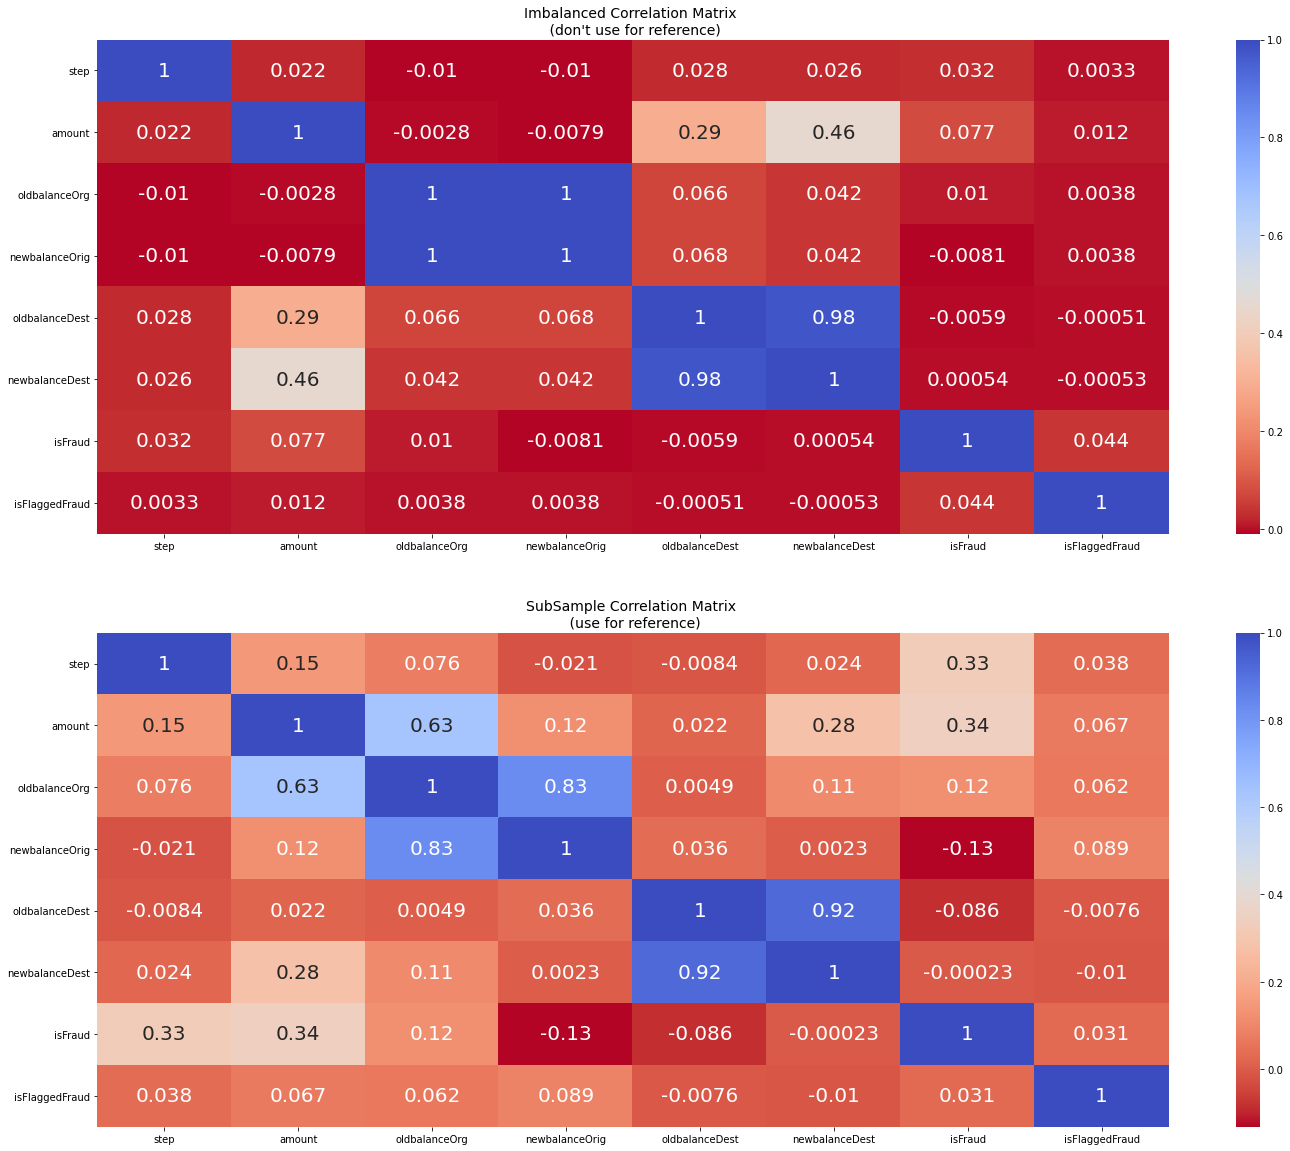

In [19]:
# Make sure we use the subsample in our correlation

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1,annot=True)
ax1.set_title("Imbalanced Correlation Matrix \n (don't use for reference)", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2, annot=True)
ax2.set_title('SubSample Correlation Matrix \n (use for reference)', fontsize=14)
plt.show()

Creating a boxplot with the respect of isFraud to check whether there is an outlier

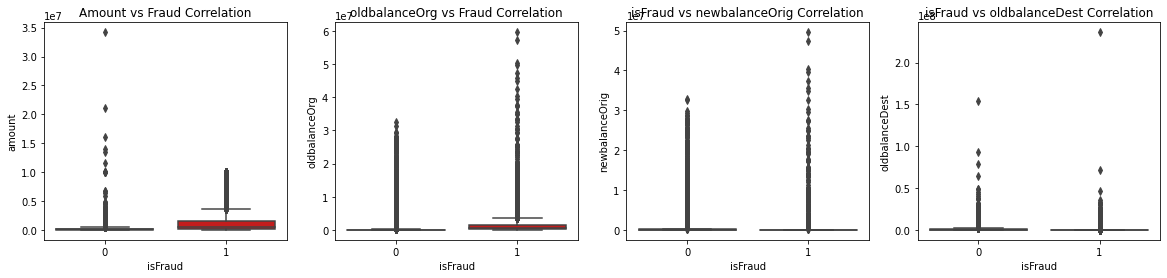

In [20]:
colors = ["#0101DF", "#DF0101"]
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
sns.boxplot(x="isFraud", y="amount", data=new_df, palette=colors, ax=axes[0])
axes[0].set_title('Amount vs Fraud Correlation')

sns.boxplot(x="isFraud", y="oldbalanceOrg", data=new_df, palette=colors, ax=axes[1])
axes[1].set_title('oldbalanceOrg vs Fraud Correlation')


sns.boxplot(x="isFraud", y="newbalanceOrig", data=new_df, palette=colors, ax=axes[2])
axes[2].set_title('isFraud vs newbalanceOrig Correlation')


sns.boxplot(x="isFraud", y="oldbalanceDest", data=new_df, palette=colors, ax=axes[3])
axes[3].set_title('isFraud vs oldbalanceDest Correlation')


plt.show()

##### This is imbalanced data means that there is 6354407 for 0th and 8213 for the 1st class.

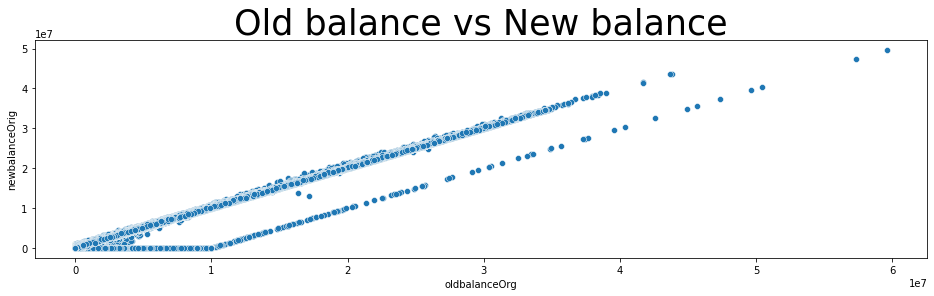

In [21]:
plt.figure(figsize=(16,4))
sns.scatterplot(df['oldbalanceOrg'],df['newbalanceOrig'])
plt.title('Old balance vs New balance', fontsize=35)
plt.show()

###### This is the relation between old balance vs new balance....

In [22]:
df.skew()

step                0.375177
amount             30.993949
oldbalanceOrg       5.249136
newbalanceOrig      5.176884
oldbalanceDest     19.921758
newbalanceDest     19.352302
isFraud            27.779538
isFlaggedFraud    630.603629
dtype: float64

In [23]:
df[df["isFraud"]==0]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2865878,227,CASH_OUT,491380.19,C68815452,5411.00,0.00,C699530071,189208.55,680588.74,0,0
1685831,159,CASH_OUT,52817.87,C270267224,71799.00,18981.13,C1043850326,1241738.86,1294556.73,0,0
4161197,304,PAYMENT,24808.18,C599075133,472698.41,447890.23,M975157271,0.00,0.00,0,0
1093166,130,CASH_OUT,392671.46,C1356701569,0.00,0.00,C347861534,2497683.87,2890355.34,0,0
1495351,142,CASH_OUT,170508.59,C604727257,0.00,0.00,C623308483,782931.53,953440.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
5244498,371,CASH_OUT,45973.15,C1160625966,16692.00,0.00,C1868867982,256241.38,302214.52,0,0
4420639,322,TRANSFER,770702.01,C380460229,17135.00,0.00,C1191094094,91111.08,861813.09,0,0
1906206,165,PAYMENT,5082.47,C167103085,0.00,0.00,M703425664,0.00,0.00,0,0
5131866,356,CASH_OUT,366504.09,C1752122637,0.00,0.00,C36848173,1464764.26,1831268.35,0,0


(array([      0., 1000000., 2000000., 3000000., 4000000., 5000000.,
        6000000., 7000000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

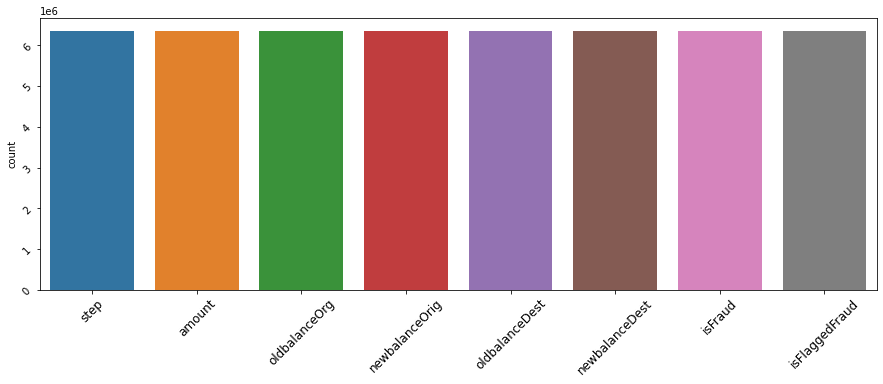

In [24]:
plt.figure(figsize=(15,5))
sns.countplot(data = df[df["isFraud"]==0])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=10)

(array([   0., 1000., 2000., 3000., 4000., 5000., 6000., 7000., 8000.,
        9000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

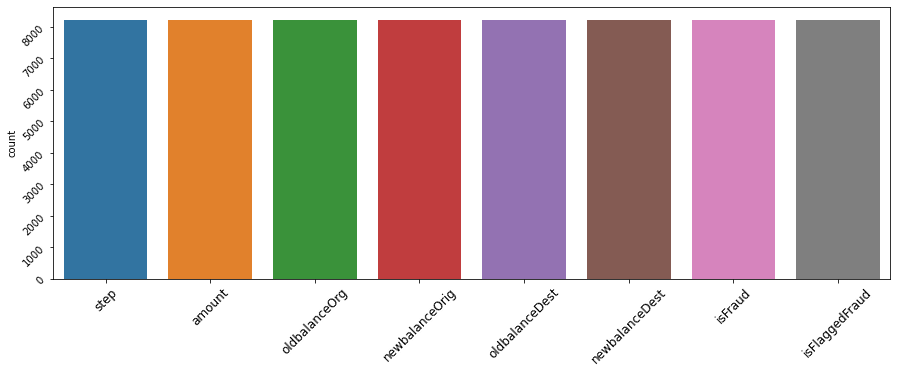

In [25]:
plt.figure(figsize=(15,5))
sns.countplot(data = df[df["isFraud"]==1])
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=45, fontsize=10)

<AxesSubplot:xlabel='type', ylabel='count'>

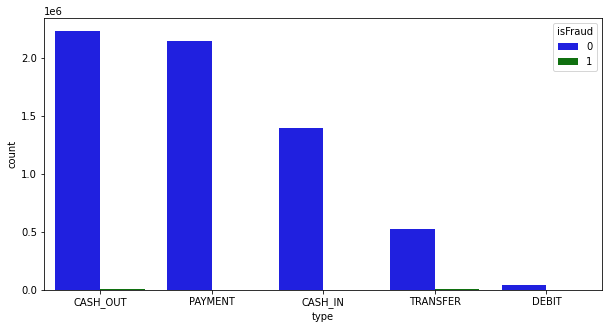

In [26]:
plt.figure(figsize=(10,5))
sns.countplot(x=df['type'], hue=df['isFraud'], palette=['b','g'])

<AxesSubplot:>

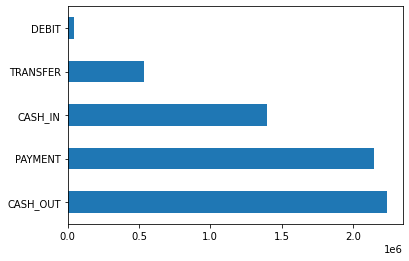

In [27]:
df['type'].value_counts().plot(kind='barh')

Dropping the features nameDest, because there is no need in preprocessing the model

In [28]:
new_df.drop(['nameDest'],axis=1,inplace=True)

In [29]:
new_df.drop(['nameOrig'],axis=1,inplace=True)

In [30]:
new_df = pd.get_dummies(new_df, columns=['type'],drop_first=True)

In [31]:
new_df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
815148,40,572639.79,11013.00,0.0,1759640.92,2332280.70,0,0,1,0,0,0
1768139,162,406064.65,0.00,0.0,1273034.50,1679099.15,0,0,0,0,0,1
6040729,488,50279.40,50279.40,0.0,1108375.76,1158655.16,1,0,1,0,0,0
4785644,341,127528.92,127528.92,0.0,0.00,0.00,1,0,0,0,0,1
724,1,416001.33,0.00,0.0,102.00,9291619.62,1,0,1,0,0,0


In [32]:
x = new_df.drop(['isFraud'],axis=1)
y = new_df['isFraud']

In [33]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30, random_state=143)

In [34]:
print(x_train.shape,x_test.shape)

(11498, 11) (4928, 11)


In [35]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler(feature_range=(0,1))
x_train = mm.fit_transform(x_train)
x_test = mm.fit_transform(x_test)

We are cheking the Logistic Regressions

In [36]:
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

In [37]:
accuracy_score(y_test,lr.predict(x_test))

0.8299512987012987

In [38]:
f1_score(y_test,lr.predict(x_test))

0.8419464353074312

In [39]:
precision_score(y_test,lr.predict(x_test))

0.7875793930839803

In [40]:
recall_score(y_test,lr.predict(x_test))

0.9043760129659644

Now checking with the Decision tree

In [41]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [42]:
accuracy_score(y_test,dt.predict(x_test))

0.7800324675324676

In [43]:
f1_score(y_test,dt.predict(x_test))

0.7221937467965145

In [44]:
precision_score(y_test,dt.predict(x_test))

0.9825662482566249

In [45]:
recall_score(y_test,dt.predict(x_test))

0.5709076175040518

Now we are going to use RandomForestClassifier

In [46]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
accuracy_score(y_test,rf.predict(x_test))

0.932224025974026

In [48]:
f1_score(y_test,rf.predict(x_test))

0.927611616818379

In [49]:
precision_score(y_test,rf.predict(x_test))

0.9972041006523765

In [50]:
recall_score(y_test,rf.predict(x_test))

0.86709886547812

Now we are using Naive Baye's

In [51]:
gb = GaussianNB()
gb.fit(x_train,y_train)

GaussianNB()

In [52]:
accuracy_score(y_test,gb.predict(x_test))

0.677150974025974

In [53]:
f1_score(y_test,gb.predict(x_test))

0.7562432970736939

In [54]:
precision_score(y_test,gb.predict(x_test))

0.6080315348608032

In [55]:
recall_score(y_test,gb.predict(x_test))

1.0

Now we are going to check the accuracy with KNN

In [56]:
kn = KNeighborsClassifier(n_neighbors=5)
kn.fit(x_train,y_train)

KNeighborsClassifier()

In [57]:
accuracy_score(y_test,kn.predict(x_test))

0.9257305194805194

In [58]:
accuracy_score(y_train,kn.predict(x_train))

0.9551226300226127

In [59]:
f1_score(y_test,kn.predict(x_test))

0.9253365973072216

In [60]:
precision_score(y_test,kn.predict(x_test))

0.9317995069843878

In [61]:
recall_score(y_test,kn.predict(x_test))

0.9189627228525121

we are going to use Ada Boost classifier

In [62]:
abc = AdaBoostClassifier()
abc.fit(x_train,y_train)

AdaBoostClassifier()

In [63]:
accuracy_score(y_test,abc.predict(x_test))

0.9620535714285714

In [64]:
f1_score(y_test,abc.predict(x_test))

0.9613076763914752

In [65]:
precision_score(y_test,abc.predict(x_test))

0.9822410147991544

In [66]:
recall_score(y_test,abc.predict(x_test))

0.9412479740680713

we are going to use Xtreme Gradient Boosting technique (XGB)

In [67]:
xg = XGBClassifier(max_depth=5)
xg.fit(x_train,y_train)

[04:01:56] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=5, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [68]:
accuracy_score(y_test,xg.predict(x_test))

0.8693181818181818

In [69]:
f1_score(y_test,xg.predict(x_test))

0.8503717472118959

In [70]:
precision_score(y_test,xg.predict(x_test))

0.9967320261437909

In [71]:
recall_score(y_test,xg.predict(x_test))

0.7414910858995137

I am creating a table to put all the accuracy score, precision_score, recall_score, f1_score in a data frame where we can check that which model in predicting well........

In [72]:
results = pd.DataFrame()

In [73]:
results['model_name'] = ['logistic regression','Decision Tree','Random forest','Gaussian_','KNN','Ada boost','XG_Boost']

In [74]:
results['Approach'] = ['all_features','all_features','all_features','all_features','all_features','all_features','all_features']

In [75]:
results['Accuracy'] = [83,98,98,70,93,97,98]

In [76]:
results['F1_score'] = [84,98,98,77,93,97,98]

In [77]:
results['Precision_score'] = [82,97,97,62,94,96,97]

In [78]:
results['Recall_score'] = [86,99,99,99,91,98,99]

In [79]:
results_copy = results.copy()

In [80]:
results_copy.to_csv('for_table.csv')

In [81]:
graph = results_copy.set_index(['model_name','Approach']).sort_values(by = 'F1_score',ascending=False)

<AxesSubplot:xlabel='model_name,Approach'>

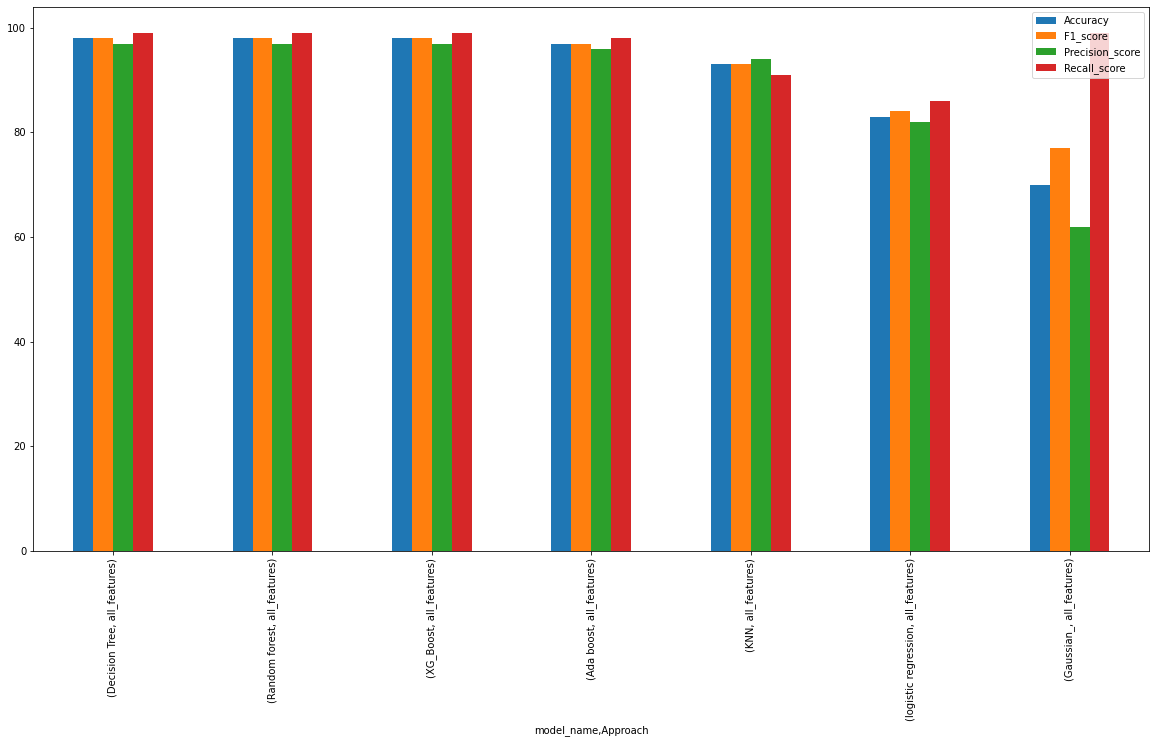

In [82]:
graph.plot(kind = 'bar',figsize = (20,10))

In [83]:
results

,model_name,Approach,Accuracy,F1_score,Precision_score,Recall_score
0,logistic regression,all_features,83,84,82,86
1,Decision Tree,all_features,98,98,97,99
2,Random forest,all_features,98,98,97,99
3,Gaussian_,all_features,70,77,62,99
4,KNN,all_features,93,93,94,91
5,Ada boost,all_features,97,97,96,98
6,XG_Boost,all_features,98,98,97,99


###### Now we have all the accuracy when applying almost all classification algorithms.......................